In [1]:
# 1973년 뉴욕의 공기의 질을 측정한 데이터셋
# 독립변수 : 온도, 종속변수 : 오존량
# 귀무가설 : 온도가 오존량에 영향을 미치치 않는다.
# 대립가설 : 온도가 오존량에 영향을 미친다.
import pandas as pd
df=pd.read_csv('d:/data/ozone/ozone.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [3]:
df2=df.dropna(axis=0) # 결측값이 있는 행 제거
df2.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


In [4]:
# scope : 기울기, intercept :  y절편
# rvalue : 상관계수, p-value : 예측 불확실성의 정도를 나타내는 값, stderr : error의 표준편차
x2=df2["Temp"].values
y2=df2["Ozone"].values
print(x2)
print(y2)

[67 72 74 62 65 59 61 69 66 68 58 64 66 57 68 62 59 73 61 61 67 81 79 76
 82 90 87 82 77 72 65 73 76 84 85 81 83 83 88 92 92 89 73 81 80 81 82 84
 87 85 74 86 85 82 86 88 86 83 81 81 81 82 89 90 90 86 82 80 77 79 76 78
 78 77 72 79 81 86 97 94 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71
 71 78 67 76 68 82 64 71 81 69 63 70 75 76 68]
[ 41.  36.  12.  18.  23.  19.   8.  16.  11.  14.  18.  14.  34.   6.
  30.  11.   1.  11.   4.  32.  23.  45. 115.  37.  29.  71.  39.  23.
  21.  37.  20.  12.  13. 135.  49.  32.  64.  40.  77.  97.  97.  85.
  10.  27.   7.  48.  35.  61.  79.  63.  16.  80. 108.  20.  52.  82.
  50.  64.  59.  39.   9.  16. 122.  89. 110.  44.  28.  65.  22.  59.
  23.  31.  44.  21.   9.  45. 168.  73.  76. 118.  84.  85.  96.  78.
  73.  91.  47.  32.  20.  23.  21.  24.  44.  21.  28.   9.  13.  46.
  18.  13.  24.  16.  13.  23.  36.   7.  14.  30.  14.  18.  20.]


In [5]:
from scipy import stats

result=stats.linregress(x2,y2)
result
# rvalue=0.698 : 이 모델은 69.8%의 설명력이 있다
# pvalue는 0.05보다 작으므로 통계적으로 유의함
# 대립가설 채택

LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174, intercept_stderr=18.755251765306646)

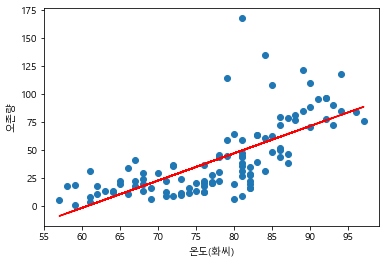

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

slope, intercept, r_value, p_value, stderr=stats.linregress(x2, y2)
plt.scatter(x2,y2) # 산점도
plt.plot(x2, slope*x2+intercept, c='red') # 회귀선
plt.xlabel('온도 (화씨)')
plt.ylabel('오존량')
plt.show()

In [10]:
# 온도가 화씨 80도일 때 오존량 예측
80*slope+intercept

47.48272006175401